<a href="https://colab.research.google.com/github/Sang555/ece228/blob/main/Copy_of_228_hariprasad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/atlantic.csv")
data.head(3)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
!pip3 install update pandas==0.25.3

     |████████████████████████████████| 10.4 MB 11.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.25.3 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.


In [4]:
len(data.ID.unique())

1814

In [5]:
data.groupby(by=["ID"]).Name.count()

ID
AL011851    14
AL011852    45
AL011853     1
AL011854    11
AL011855     1
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1814, dtype: int64

In [6]:
data.groupby(by=["ID"]).Name.count().max()

133

In [7]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [8]:
data.isnull().sum(axis = 0)

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [9]:
data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitudesign'] = data['Latitude'].str[-1]
data['Longitude1'] = data['Longitude'].str[:-1]
max(data['Longitude1'])
#data.head(5)


'99.9'

In [10]:
!wget https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py
!wget https://github.com/Sang555/ece228/blob/main/projection_constants.json

--2022-05-08 04:18:55--  https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6860 (6.7K) [text/plain]
Saving to: ‘lambert.py’

lambert.py          100%[===================>]   6.70K  --.-KB/s    in 0s      

2022-05-08 04:18:55 (101 MB/s) - ‘lambert.py’ saved [6860/6860]

--2022-05-08 04:18:55--  https://github.com/Sang555/ece228/blob/main/projection_constants.json
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘projection_constants.json’

projection_constant     [ <=>                ] 130.19K  --.-KB/s    in 0.02s   

2022-05-08 04:18:55

In [11]:
#@title
import numpy as np
import pandas as pd
import json
import httpimport
#import https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py?token=GHSAT0AAAAAABR2ACEM3YMSPDKAFI6FULWMYTPLGCA
from lambert import Lambert
#with open('projection_constants.json', 'r') as f: 
 # const = json.load(f)
# Test if our custom implementation of Lambert projection yields same results as Cartopy:


# data['Latitude1'] = data['Latitude'].map(lambda x: float(str(x)[:-3]))
# data['Longitude1'] = data['Longitude'].map(lambda x: float(str(x)[:-3]))
data['Latitude1'] = pd.to_numeric(data['Latitude1'])
data['Longitude1'] = pd.to_numeric(data['Longitude1'])
lat_true = data['Latitude1']
lon_true = data['Longitude1']

lamb = Lambert(
    standard_parallels=(33, 45),
    central_latitude=0, central_longitude=0,
    false_easting=400000, false_northing=400000,
    semimajor_axis = 6377397.155, inverse_flattening = 299.1528153513275
)

x_test, y_test = lamb.geographic2cartesian(lat_true, lon_true)
data['lcc_x'] = x_test
data['lcc_y'] = y_test
# print('Forward direction - largest absolute errors: x = {}, y = {}'.format(np.max(np.abs(x_test-x_true)), np.max(np.abs(y_test-y_true))))

# lat_test, lon_test = lamb.cartesian2geographic(x_true, y_true)
# print('Backward direction - largest absolute errors: lat = {}, lon = {}'.format(np.max(np.abs(lat_test-lat_true)), np.max(np.abs(lon_test-lon_true))))



In [12]:

data['difference_lat'] = data.groupby('ID')['Latitude1'].diff()
data['difference_lon'] = data.groupby('ID')['Longitude1'].diff()
data['trans_dir'] = np.arctan(data['difference_lat']/data['difference_lon'])

In [13]:
data.head(5)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,High Wind SW,High Wind NW,Latitude1,Latitudesign,Longitude1,lcc_x,lcc_y,difference_lat,difference_lon,trans_dir
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,28.0,N,94.8,8.218382e+06,8.295660e+06,NaN,NaN,NaN
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,28.0,N,95.4,8.248290e+06,8.347380e+06,0.0,0.6,0.000000
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,28.0,N,96.0,8.277857e+06,8.399296e+06,0.0,0.6,0.000000
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,28.1,N,96.5,8.292437e+06,8.448174e+06,0.1,0.5,0.197396
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,28.2,N,96.8,8.297119e+06,8.479684e+06,0.1,0.3,0.321751


In [14]:
def haversine(coord1: object, coord2: object, lat2: object, lon2: object):
    import math

    # # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    # lon1, lat1 = coord1
    # lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat2 - coord1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(coord1)
    delta_lambda = math.radians(coord2)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)/(6*3600)
    return meters



In [15]:
data['trans_speed'] = data.apply(lambda x: haversine(x['difference_lat'],x['difference_lon'],x['Latitude1'],x['Longitude1']), axis=1)
data.head(5)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,High Wind NW,Latitude1,Latitudesign,Longitude1,lcc_x,lcc_y,difference_lat,difference_lon,trans_dir,trans_speed
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,28.0,N,94.8,8.218382e+06,8.295660e+06,NaN,NaN,NaN,NaN
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,28.0,N,95.4,8.248290e+06,8.347380e+06,0.0,0.6,0.000000,2.727200
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,28.0,N,96.0,8.277857e+06,8.399296e+06,0.0,0.6,0.000000,2.727200
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,28.1,N,96.5,8.292437e+06,8.448174e+06,0.1,0.5,0.197396,2.329212
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,28.2,N,96.8,8.297119e+06,8.479684e+06,0.1,0.3,0.321751,1.455758


In [16]:
max(data['trans_speed'][1:])

40.48433027777778

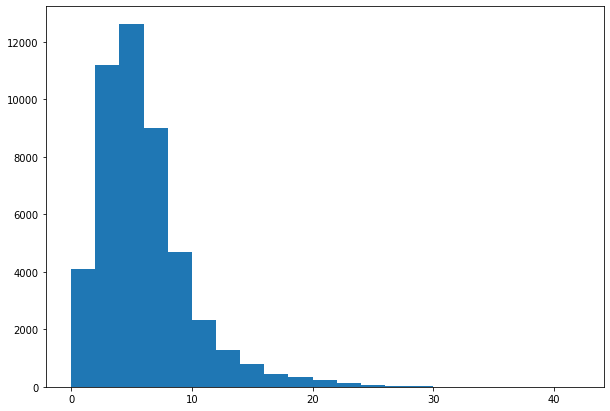

In [17]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['trans_speed'], bins = range(0,44,2))
 
# Show plot
plt.show()

In [18]:
clean =  data['Longitude1']>=-180
data3 = data[clean]


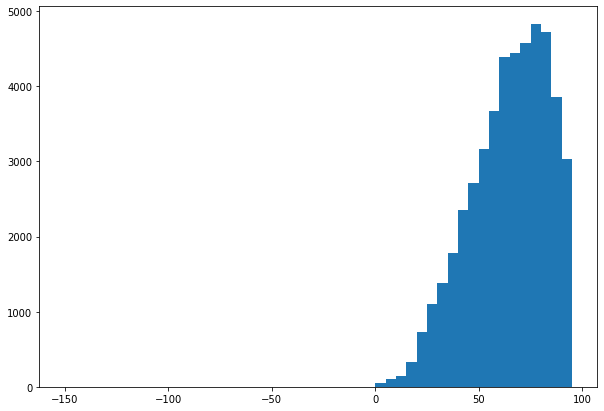

0.0

In [19]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data3['Longitude1'], bins = range(-150,100,5))
 
# Show plot
plt.show()
min(data3['Longitude1'])

In [20]:
data2 = data.groupby('ID').filter(lambda x: len(x) > 6)

In [21]:
max(data2['Longitude1'])

359.1

In [22]:
min(data2['Longitude1'])

0.0

In [23]:
is_359 =  data2['Longitude1']<-109.5
data_359 = data2[is_359]
print(data_359)

Empty DataFrame
Columns: [ID, Name, Date, Time, Event, Status, Latitude, Longitude, Maximum Wind, Minimum Pressure, Low Wind NE, Low Wind SE, Low Wind SW, Low Wind NW, Moderate Wind NE, Moderate Wind SE, Moderate Wind SW, Moderate Wind NW, High Wind NE, High Wind SE, High Wind SW, High Wind NW, Latitude1, Latitudesign, Longitude1, lcc_x, lcc_y, difference_lat, difference_lon, trans_dir, trans_speed]
Index: []

[0 rows x 31 columns]


In [24]:
a1 = lamb.geographic2cartesian(7.4, 109.5)
a2 = lamb.geographic2cartesian(81, 109.5)
a3 = lamb.geographic2cartesian(7.4, 63)
a4 = lamb.geographic2cartesian(81, 63)



In [25]:
d1=math.sqrt((a2[0]-a3[0])**2+(a2[1]-a3[1])**2);
d2=math.sqrt((a1[0]-a3[0])**2+(a2[1]-a3[1])**2);
area_gridspace = 0.5*d1*d2
print(area_gridspace,d1,d2)

40385996717224.54 9367741.199450348 8622355.348500488


In [26]:
a1,a2,a3,a4

((array(11121468.95094128), array(8744214.95371708)),
 (array(2750791.0781381), array(11950825.67104745)),
 (array(7737114.33312355), array(4020431.25609741)),
 (array(2008736.91772168), array(10915088.06622571)))

In [27]:
step_size=math.sqrt(area_gridspace)/60;
step_size

105916.62957935953

In [28]:
storm_cnt_mat=np.zeros([60,60])
print(storm_cnt_mat.shape)

(60, 60)


In [29]:
import collections
d = collections.defaultdict(dict)

In [30]:
data2.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW',
       'Latitude1', 'Latitudesign', 'Longitude1', 'lcc_x', 'lcc_y',
       'difference_lat', 'difference_lon', 'trans_dir', 'trans_speed'],
      dtype='object')

In [31]:
data2['col'] = (data2['lcc_x']-11121468.95094128)/step_size
data2['col'] = data2['col'].apply(np.ceil)
data2['row'] = (data2['lcc_y']-8744214.95371708)/step_size
data2['row'] = data2['row'].apply(np.ceil)

In [32]:
data3 = data2.groupby(['col', 'row']).size().reset_index(name='count')
data3.head(4)
data3.shape

(3763, 3)

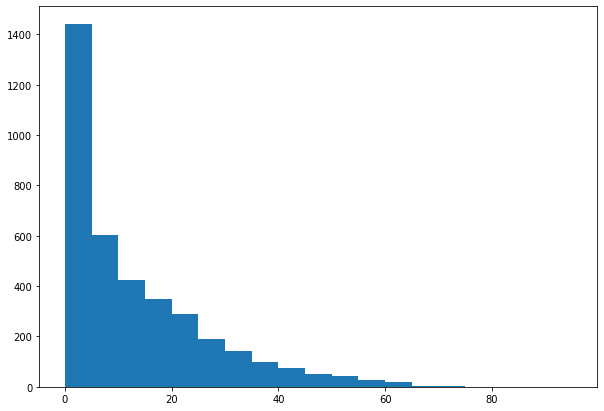

1

In [33]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data3['count'], bins = range(0,100,5))
# Show plot
plt.show()
min(data3['count'])

In [34]:
data2.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW',
       'Latitude1', 'Latitudesign', 'Longitude1', 'lcc_x', 'lcc_y',
       'difference_lat', 'difference_lon', 'trans_dir', 'trans_speed', 'col',
       'row'],
      dtype='object')

In [35]:
X_points_to_trav = np.ceil(math.sqrt((a1[0]-a3[0])**2+(a1[1]-a3[1])**2)/step_size).astype(int);
#Y_points_to_trav = a4[1]-a2[1]/step_size:
print('No of points in X',X_points_to_trav)

Y_points_to_trav=np.ceil(math.sqrt((a1[0]-a2[0])**2+(a1[1]-a2[1])**2)/step_size).astype(int);
print('No of points in Y',Y_points_to_trav)

#matrix which contains the count of all the storms 
storm_cnt=np.zeros([X_points_to_trav,Y_points_to_trav])

No of points in X 55
No of points in Y 85


In [76]:
from inspect import EndOfBlock
hurricane_lcc_x = np.array(data2.get('lcc_x'));
hurricane_lcc_y = np.array(data2.get('lcc_y'));
print(hurricane_lcc_x.shape)
print(hurricane_lcc_y.shape)
concat_mat = np.vstack([hurricane_lcc_x,hurricane_lcc_y]).T
print(concat_mat.shape)
np.testing.assert_array_equal(concat_mat.T[0],hurricane_lcc_x, err_msg='array is wrong', verbose=True);
a=[a4[0],a3[1]];
b=[a4[0]+step_size,a3[1]];
c=[a4[0]+step_size,a3[1]+step_size];
d=[a4[0]+step_size,a3[1]];
x_axis=0;
y_axis=0;
row= np.ceil((a1[0]-a3[0])/step_size).astype(int);
col = np.ceil((a2[1]-a3[1])/step_size).astype(int);
print(row,col)
displacement_mat = np.zeros((row,col));
print(displacement_mat.shape)
while d[1] <= a2[1]:
  y_axis = y_axis+1;
  x_axis=0;
  print('y_axis',y_axis);
  while b[0] <= a1[0]:
      lcc_x_constrained_idx = np.where((concat_mat[0] >= a[0]) & (concat_mat[0] < b[0])); 
      lcc_x_constrained_mat = concat_mat[lcc_x_constrained_idx];
      if lcc_x_constrained_mat.size == 0:
        x_axis=x_axis+1;
        a[0] = a[0] + x_axis*step_size;
        b[0] = b[0] + x_axis*step_size;
        d[0] = d[0] + x_axis*step_size; 
      else:
        lcc_y_constrained = np.where((lcc_x_constrained_mat >= a[1]) & (lcc_x_constrained_mat) < d[1])
        displacement_mat[x_axis][y_axis] = lcc_y_constrained;
        x_axis=x_axis+1;
        a[0] = a[0] + x_axis*step_size;
        b[0] = b[0] + x_axis*step_size;
        d[0] = d[0] + x_axis*step_size; 
      print('x_axis',x_axis);   
  a[1] = a[1] + y_axis*step_size;
  b[1] = b[1] + y_axis*step_size;
  d[1] = d[1] + y_axis*step_size;  







(48792,)
(48792,)
(48792, 2)
32 75
(32, 75)
y_axis 1
x_axis 1
x_axis 2
x_axis 3
x_axis 4
x_axis 5
x_axis 6
x_axis 7
x_axis 8
x_axis 9
x_axis 10
x_axis 11
x_axis 12
x_axis 13
y_axis 2
y_axis 3
y_axis 4
y_axis 5
y_axis 6
y_axis 7
y_axis 8
y_axis 9
y_axis 10
y_axis 11
y_axis 12
